<a href="https://colab.research.google.com/github/mayankmjk/DL_LAb/blob/main/Experiment__3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part A: Single-Layer Neural Network (Linear Dataset)

Linear Accuracy: 100.0 %


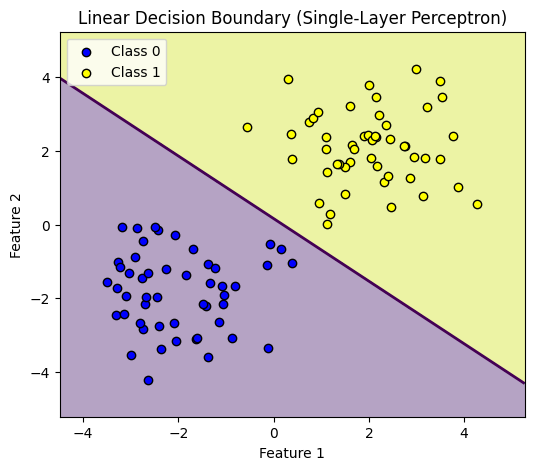

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Generate Linear Dataset
# ---------------------------
np.random.seed(0)
X1 = np.random.randn(50, 2) + [2, 2]
X2 = np.random.randn(50, 2) + [-2, -2]
X = np.vstack((X1, X2))
y = np.array([1]*50 + [0]*50).reshape(-1, 1)

# ---------------------------
# Sigmoid Function
# ---------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ---------------------------
# Initialize Parameters
# ---------------------------
W = np.random.randn(2, 1)
b = 0.0
lr = 0.1

# ---------------------------
# Training
# ---------------------------
for _ in range(1000):
    z = X @ W + b
    y_pred = sigmoid(z)

    dW = X.T @ (y_pred - y) / len(X)
    db = np.mean(y_pred - y)

    W -= lr * dW
    b -= lr * db

# ---------------------------
# Accuracy
# ---------------------------
y_out = (sigmoid(X @ W + b) > 0.5).astype(int)
accuracy = np.mean(y_out == y) * 100
print("Linear Accuracy:", accuracy, "%")

# ---------------------------
# Decision Boundary Plot (CORRECT)
# ---------------------------
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = sigmoid(grid @ W + b).reshape(xx.shape)

Z = (probs > 0.5).astype(int)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.contour(xx, yy, probs, levels=[0.5], linewidths=2)
plt.scatter(X[y.ravel()==0,0], X[y.ravel()==0,1],
            color='blue', edgecolor='k', label='Class 0')
plt.scatter(X[y.ravel()==1,0], X[y.ravel()==1,1],
            color='yellow', edgecolor='k', label='Class 1')
plt.legend()
plt.title("Linear Decision Boundary (Single-Layer Perceptron)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()




Part B: Multi-Layer Neural Network (Non-Linear Dataset)



In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# XOR Dataset (Non-Linear)
# ---------------------------
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

# ---------------------------
# Activation Functions
# ---------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

# ---------------------------
# Initialize Parameters
# ---------------------------
np.random.seed(1)
W1 = np.random.randn(2, 4)
b1 = np.zeros((1, 4))
W2 = np.random.randn(4, 1)
b2 = np.zeros((1, 1))

lr = 0.5
epochs = 10000

# ---------------------------
# Training
# ---------------------------
for _ in range(epochs):
    # Forward pass
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_pred = sigmoid(z2)

    # Backpropagation
    error = y_pred - y
    dW2 = a1.T @ error
    db2 = np.sum(error, axis=0, keepdims=True)

    da1 = error @ W2.T
    dz1 = da1 * sigmoid_derivative(a1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

# ---------------------------
# Accuracy
# ---------------------------
y_out = (y_pred > 0.5).astype(int)
accuracy = np.mean(y_out == y) * 100

print("Predictions:")
print(y_out)
print("Accuracy:", accuracy, "%")


Predictions:
[[0]
 [1]
 [1]
 [0]]
Accuracy: 100.0 %


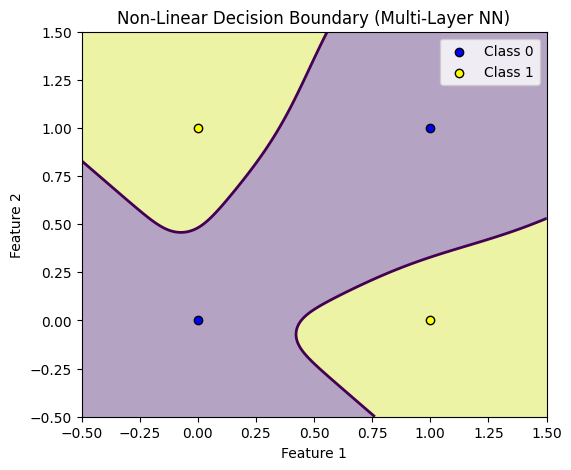

In [17]:
# ---------------------------
# Decision Boundary Plot
# ---------------------------
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

grid = np.c_[xx.ravel(), yy.ravel()]
a1 = tanh(grid @ W1 + b1)
probs = sigmoid(a1 @ W2 + b2).reshape(xx.shape)

Z = (probs > 0.5).astype(int)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.contour(xx, yy, probs, levels=[0.5], linewidths=2)
plt.scatter(X[y.ravel()==0,0], X[y.ravel()==0,1],
            color='blue', edgecolor='k', label='Class 0')
plt.scatter(X[y.ravel()==1,0], X[y.ravel()==1,1],
            color='yellow', edgecolor='k', label='Class 1')
plt.legend()
plt.title("Non-Linear Decision Boundary (Multi-Layer NN)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
